In [2]:
import time
import numpy as np
from numpy.random import randint
import collections
from collections import Counter
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import pickle
import h5py

from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [3]:
# randomly generate some fake data
#rate_true = np.random.randint(0, 5, 100)
#rate_predicted = np.random.randint(0, 5, 100)

# binarize to one-hot encoding
#y_true = label_binarize(rate_true, classes=[0,1,2,3,4])
#y_pred = label_binarize(rate_predicted, classes=[0,1,2,3,4])

#### Load the true label of the testing data

In [4]:
h5f = h5py.File('Data/hdf5/sample.hdf5','r')
y_true = h5f['y_test'][:]
h5f.close()

In [5]:
rate_true = np.argmax(y_true, axis=1)

ValueError: axis(=1) out of bounds

#### Load the predicted result from the trained model

In [5]:
rate_predicted = pickle.load(open('Data/y_pred.pkl', 'r'))

In [6]:
y_pred = label_binarize(rate_predicted, classes=[0,1,2,3,4])

In [9]:
rate_predicted

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

#### Print the quadratic weighted kappa

In [7]:
sys.path.append("quadratic_kappa.py")
import quadratic_kappa

Couldn't import dot_parser, loading of dot files will not be possible.


In [8]:
print "Quadratic Weighted Kappa:"
print quadratic_kappa.quadratic_kappa_cost(rate_true, rate_predicted)

Quadratic Weighted Kappa:
0.91


#### Normalized Confusion Matrix

Confusion matrix:
[[ 0 12]
 [ 0  0]]


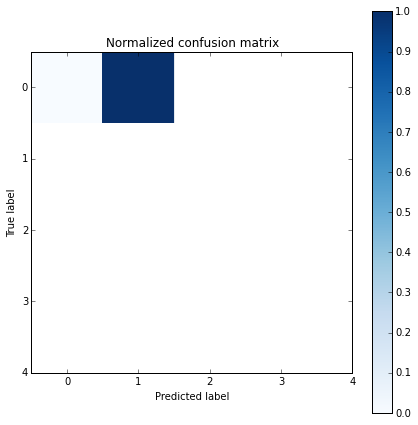

In [12]:
cm = confusion_matrix(rate_true, rate_predicted)
print "Confusion matrix:"
print cm 

# plot the normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(5)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### ROC Curve & AUC

/usr/local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:496: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


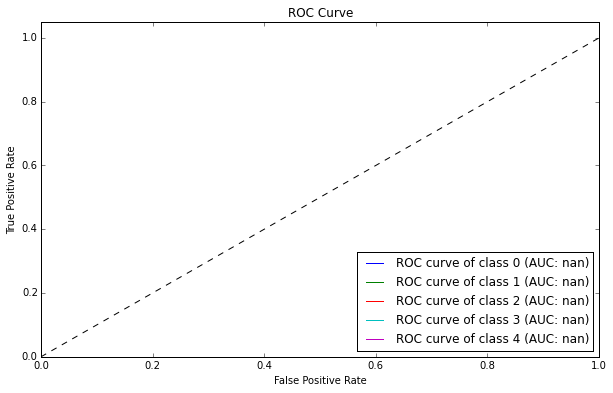

In [13]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
fig, ax = plt.subplots(figsize=(10,6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC: {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Classification Report

In [15]:
from sklearn.metrics import classification_report
target_names = ['label 0', 'label 1', 'label 2', 'label 3', 'label 4']
print classification_report(rate_true, rate_predicted, target_names=target_names)

             precision    recall  f1-score   support

    label 0       0.00      0.00      0.00        12
    label 1       0.00      0.00      0.00         0

avg / total       0.00      0.00      0.00        12

